# Exploratory Data Analysis of Global Temperature Change (1961-2019)

## Overview
This project explores temperature changes across various countries and months from 1961 to 2019. The goal is to analyze trends in temperature variations, detect anomalies, and gain insights into long-term climate change patterns. This analysis includes cleaning and transforming the dataset, handling missing values, visualizing trends, and generating insights for climate-related research.


## Step 1: Load the Dataset and Inspect its Structure

### Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [2]:
# Load the dataset
data = pd.read_csv("/Users/ishahiteshbhaishekh/Downloads/Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='latin1')

# Display the first few rows
data.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


### Initial Inspection

We start by inspecting the structure of the dataset to understand its columns, data types, and basic properties.


In [3]:
# Check the structure and info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

## Step 2: Data Cleaning

### Handle Missing Values
We fill missing values in categorical columns with "Unknown" and numerical columns with the median value to avoid distorting the analysis.

In [4]:
# Fill missing values
data['Area'].fillna('Unknown', inplace=True)
data['Months'].fillna('Unknown', inplace=True)

In [5]:
# Fill missing temperature values with the median for each column
for year in range(1961, 2020):
    column_name = f'Y{year}'
    data[column_name].fillna(data[column_name].median(), inplace=True)

### Convert Data Types
Ensure that the year columns are numeric for accurate calculations.


In [6]:
# Convert year columns to numeric
for year in range(1961, 2020):
    column_name = f'Y{year}'
    data[column_name] = pd.to_numeric(data[column_name], errors='coerce')

### Remove Duplicates

Remove any duplicate rows from the dataset.

In [7]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)


## Step 3: Exploratory Data Analysis (EDA)

Analyze temperature trends across time, locations, and seasons using various visualizations and statistical summaries.

### Average Temperature Change Over Time

In [8]:
# Calculate the average temperature change over time
year_columns = [f'Y{year}' for year in range(1961, 2020)]
mean_temperature = data[year_columns].mean()

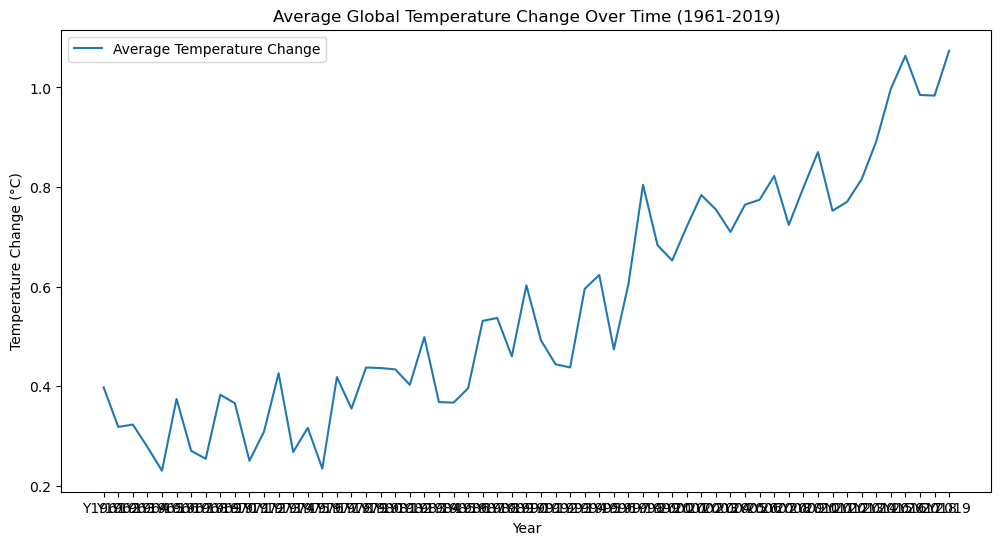

In [9]:
# Plot the average temperature change over time
plt.figure(figsize=(12, 6))
plt.plot(mean_temperature, label="Average Temperature Change")
plt.title("Average Global Temperature Change Over Time (1961-2019)")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.legend()
plt.show()

### Temperature Change in Canada

Filter the data for Canada to analyze its temperature changes over the years.

In [10]:
# Filter data for Canada
canada_data = data[data['Area'] == 'Canada']

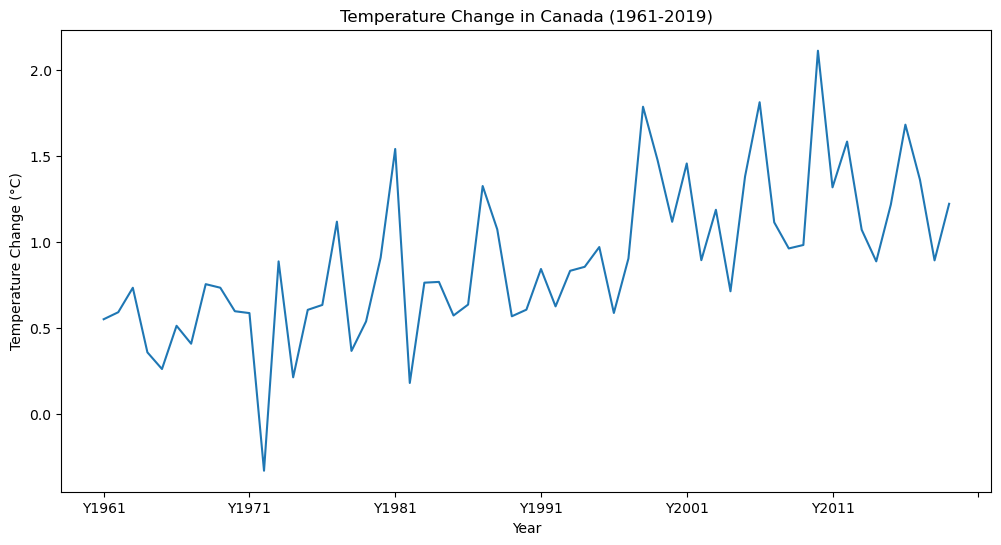

In [11]:
# Plot temperature changes over time for Canada
canada_data[year_columns].mean().plot(figsize=(12, 6))
plt.title("Temperature Change in Canada (1961-2019)")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.show()

### Monthly Analysis

### January Temperature Change Over Time

Examine temperature trends specifically for the month of January to detect any seasonal variations.

In [12]:
# Filter for January data
january_data = data[(data['Months'] == 'January') & (data['Element'] == 'Temperature change')]

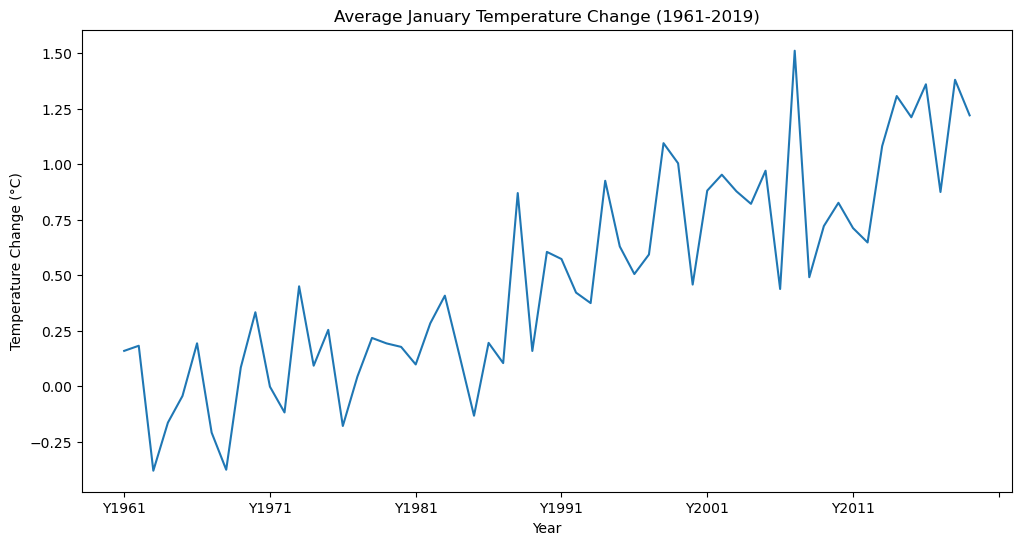

In [13]:
# Plot the average January temperature change over time
january_data[year_columns].mean().plot(figsize=(12, 6))
plt.title("Average January Temperature Change (1961-2019)")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.show()

## Step 4: Visualizations

Create various plots to visualize temperature trends across time, areas, and seasons.

### Heatmap of Temperature Change by Area and Year 

In [14]:
# Pivot the data to create a heatmap
heatmap_data = data.pivot_table(index='Area', values=year_columns, aggfunc='mean')

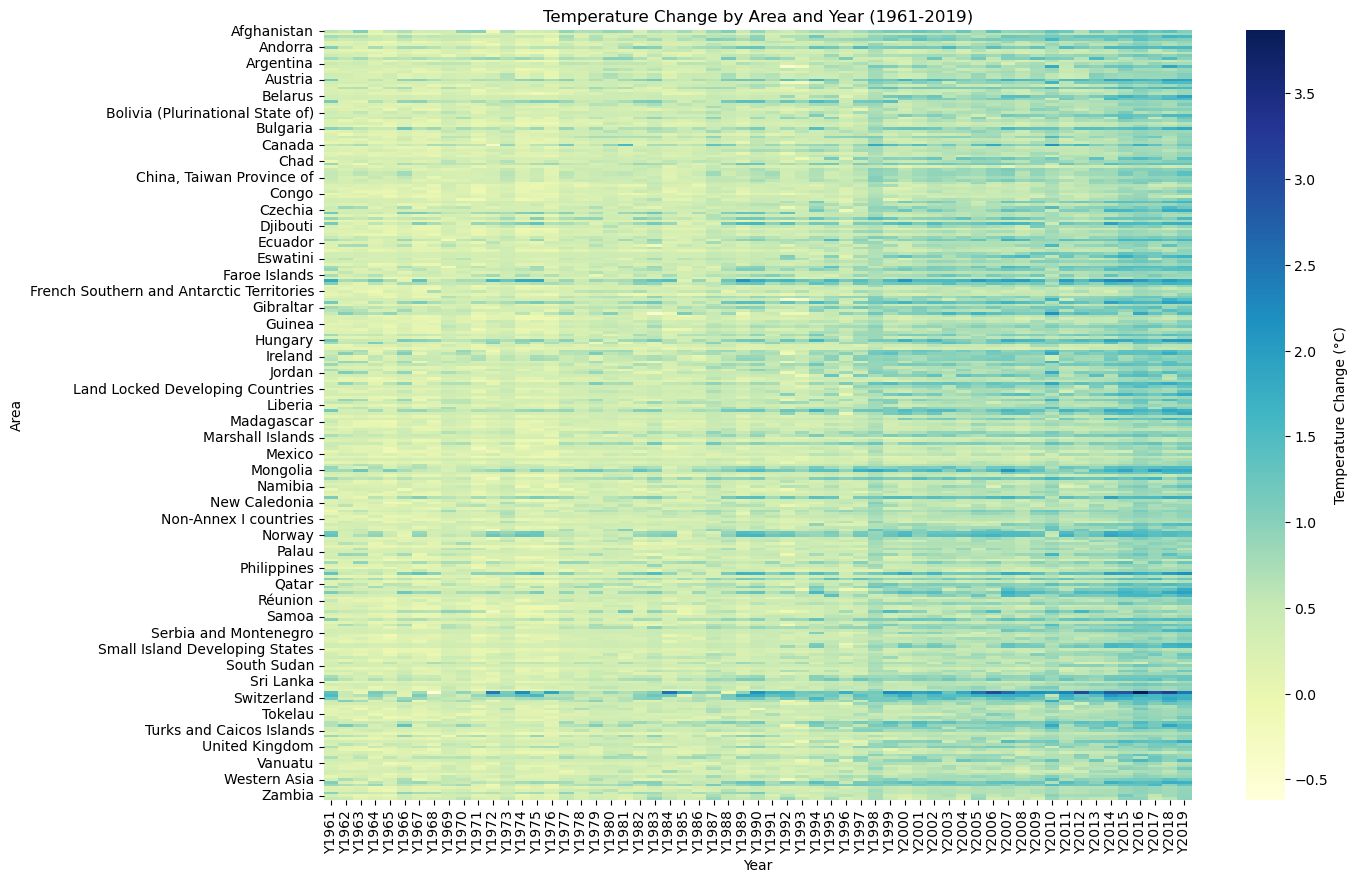

In [15]:
# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Temperature Change (°C)'})
plt.title("Temperature Change by Area and Year (1961-2019)")
plt.xlabel("Year")
plt.ylabel("Area")
plt.show()

## Step 5: Conclusions and Insights

### Key Findings
- The average global temperature change has shown an increasing trend from 1961 to 2019.
- Certain areas, such as Canada, exhibit significant variability in temperature changes over time.
- Seasonal variations are apparent, with some months showing distinct trends in temperature changes.

### Future Work
- This analysis can be expanded to include more regions or different time intervals.
- Incorporate external datasets for deeper climate change insights, such as precipitation data or carbon emissions.

### Limitations
- The dataset is limited to temperature change, and other factors like wind speed or humidity are not considered.
- The data may contain inconsistencies due to historical measurement techniques and reporting standards.

## Step 6: Save the Cleaned Dataset
Save the cleaned dataset for future use or further analysis.

In [16]:
# Save the cleaned data
data.to_csv("cleaned_environment_temperature_data.csv", index=False)